In [19]:
#importing libraries

import numpy as nm

import matplotlib.pyplot as mtp

import pandas as pd

In [20]:
#importing datasets

data_set= pd.read_csv("C:\\Users\\HP1\\OneDrive\\Desktop\\diabetes.csv")

data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
#Extracting Independent and dependent Variable

x= data_set.iloc[:, [2,3]].values

y= data_set.iloc[:, 4].values

data_set.info


<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [22]:
data_set.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
X = data_set.iloc[:, 0:8].values  # Selecting columns from index 0 to 7 (inclusive)
y = data_set.iloc[:, 8].values    # Selecting column 8


In [24]:
data_set.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

2. Split the dataset into train and test and perform feature scaling

In [25]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
    
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
    
#feature Scaling
    
from sklearn.preprocessing import StandardScaler
    
st_x= StandardScaler()
    
x_train= st_x.fit_transform(x_train)
    
x_test= st_x.transform(x_test)    
    

Feature scaling is done to apply the same transformation on train as well as test so that all vaues are in comparable range.

1.Fitting the model



In [26]:
#Fitting K-NN classifier to the training set

from sklearn.neighbors import KNeighborsClassifier

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=3 )

classifier.fit(x_train, y_train) #training

KNeighborsClassifier(p=3)

2.Testing and Evaluation

In [27]:
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))


0.6939130434782609
0.65625


3.Visualising the result

C:\Users\HP1\AppData\Local\Temp\ipykernel_15508\1676647013.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


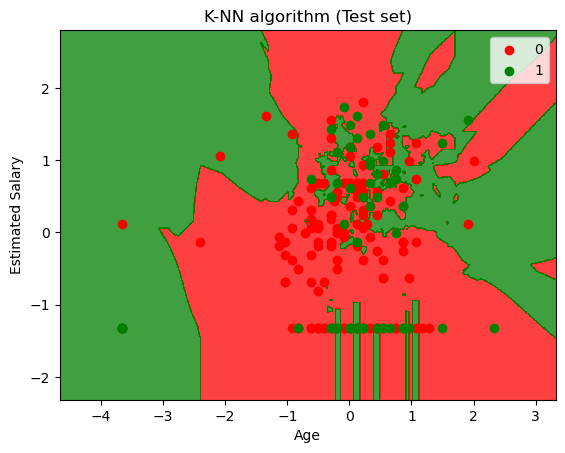

In [28]:
#Visualizing the test set result

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN algorithm (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [29]:
from sklearn.svm import SVC

In [30]:
# Building a Support Vector Machine on train data

svc_model2 = SVC(C= .5, gamma= 10)# Hyperparameters

svc_model2.fit(x_train, y_train)

SVC(C=0.5, gamma=10)

In [31]:
prediction = svc_model2 .predict(x_test)

In [32]:
# check the accuracy on the training set

print(svc_model2.score(x_train, y_train))

print(svc_model2.score(x_test, y_test))

0.6852173913043478
0.65625
